In [85]:
import pandas as pd


In [86]:
prod = pd.read_csv("SA_prod_cropandlivestock.csv")
prod.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1961,1961,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
1,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1961,1961,t,80.0,E,Estimated value,NaN
2,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1962,1962,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN
3,QCL,Crops and livestock products,32,Argentina,5510,Production,01371,"Almonds, in shell",1962,1962,t,90.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,32,Argentina,5312,Area harvested,01371,"Almonds, in shell",1963,1963,ha,0.0,M,"Missing value (data cannot exist, not applicable)",NaN


In [87]:
production = prod.loc[prod["Element"] == "Production"]
production.head()
production = production.loc[production["Area"] == "Brazil"]

In [88]:
production

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39019,QCL,Crops and livestock products,76,Brazil,5510,Production,01371,"Almonds, in shell",1990,1990,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
39021,QCL,Crops and livestock products,76,Brazil,5510,Production,01371,"Almonds, in shell",1991,1991,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
39023,QCL,Crops and livestock products,76,Brazil,5510,Production,01371,"Almonds, in shell",1992,1992,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
39025,QCL,Crops and livestock products,76,Brazil,5510,Production,01371,"Almonds, in shell",1993,1993,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
39027,QCL,Crops and livestock products,76,Brazil,5510,Production,01371,"Almonds, in shell",1994,1994,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59120,QCL,Crops and livestock products,76,Brazil,5510,Production,01540,Yams,2018,2018,t,251976.61,I,Imputed value,NaN
59123,QCL,Crops and livestock products,76,Brazil,5510,Production,01540,Yams,2019,2019,t,252561.39,I,Imputed value,NaN
59126,QCL,Crops and livestock products,76,Brazil,5510,Production,01540,Yams,2020,2020,t,252123.30,I,Imputed value,NaN
59129,QCL,Crops and livestock products,76,Brazil,5510,Production,01540,Yams,2021,2021,t,252575.46,I,Imputed value,NaN


Can I predict the economic impact of a particular crop or livestock product?

SVM regression could be used to predict the economic impact (e.g., farm gate value, government expenditure, revenue) of different crop/livestock products in a given year based on data such as production volume and prices.

In [89]:
production.Item.unique()

array(['Almonds, in shell', 'Apples', 'Avocados',
       'Balata, gutta-percha, guayule, chicle and similar natural gums in primary forms or in plates, sheets or strip',
       'Bananas', 'Barley', 'Beans, dry', 'Beer of barley, malted',
       'Beeswax', 'Brazil nuts, in shell',
       'Broad beans and horse beans, dry', 'Buckwheat',
       'Butter of cow milk', 'Buttermilk, dry',
       'Cantaloupes and other melons', 'Cashew nuts, in shell',
       'Cashewapple', 'Cassava, fresh', 'Castor oil seeds',
       'Cattle fat, unrendered', 'Cheese from skimmed cow milk',
       'Cheese from whole cow milk', 'Chestnuts, in shell', 'Cocoa beans',
       'Coconut oil', 'Coconuts, in shell', 'Coffee, green',
       'Cotton lint, ginned', 'Cotton seed', 'Cottonseed oil',
       'Cream, fresh', 'Edible offal of cattle, fresh, chilled or frozen',
       'Edible offal of goat, fresh, chilled or frozen',
       'Edible offal of pigs, fresh, chilled or frozen',
       'Edible offal of sheep, fresh, 

In [90]:
fg = pd.read_csv("FarmGate.csv")
fg.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,76,Brazil,72392,Crop residues (N content),115,Barley,1961,1961,3050,FAO TIER 1,kg,430355.1710,E,Estimated value,NaN
1,GCE,Emissions from Crops,76,Brazil,72302,Crop residues (Emissions N2O),115,Barley,1961,1961,3050,FAO TIER 1,kt,0.0083,E,Estimated value,NaN
2,GCE,Emissions from Crops,76,Brazil,72342,Crop residues (Direct emissions N2O),115,Barley,1961,1961,3050,FAO TIER 1,kt,0.0068,E,Estimated value,NaN
3,GCE,Emissions from Crops,76,Brazil,72362,Crop residues (Indirect emissions N2O),115,Barley,1961,1961,3050,FAO TIER 1,kt,0.0015,E,Estimated value,NaN
4,GCE,Emissions from Crops,76,Brazil,72392,Crop residues (N content),115,Barley,1962,1962,3050,FAO TIER 1,kg,448925.7355,E,Estimated value,NaN


In [91]:
fg.Element.value_counts()

Crop residues (Emissions N2O)                         682
Crop residues (N content)                             620
Crop residues (Direct emissions N2O)                  620
Crop residues (Indirect emissions N2O)                620
Burning crop residues (Biomass burned, dry matter)    248
Burning crop residues (Emissions N2O)                 248
Burning crop residues (Emissions CH4)                 248
Area harvested                                         62
Rice cultivation (Emissions CH4)                       62
Name: Element, dtype: int64

In [92]:
fg.Item.value_counts()

Rice            558
Maize (corn)    434
Wheat           434
Barley          248
Beans, dry      248
Sugar cane      248
Oats            248
Potatoes        248
Rye             248
Sorghum         248
Soya beans      248
Name: Item, dtype: int64

In [93]:
fg.Unit.value_counts()

kt    2480
kg     620
t      248
ha      62
Name: Unit, dtype: int64

In [94]:
cr_fg = fg.loc[fg['Element'] == "Crop residues (Emissions N2O)"]

In [95]:
cr_fg.Unit.unique()

array(['kt'], dtype=object)

In [96]:
cr_fg_totals = cr_fg.groupby(['Item', 'Year'])['Value'].sum().reset_index()
cr_fg_totals.columns = ["Item", "Year", "Crop Residues (N2O)"]
cr_fg_totals

,Item,Year,Crop Residues (N2O)
0,Barley,1961,0.0083
1,Barley,1962,0.0086
2,Barley,1963,0.0074
3,Barley,1964,0.0091
4,Barley,1965,0.0091
...,...,...,...
677,Wheat,2018,1.3895
678,Wheat,2019,1.4187
679,Wheat,2020,1.6131
680,Wheat,2021,1.9834


Prediction of Emissions from Agriculture
Target Variable: Emissions (e.g., N2O, CH4) from agricultural activities.

What to Predict: You can predict the level of emissions from crop or livestock production based on crop type, land use, production data, and year.
How SVM Helps: By training an SVM regression model (SVR), you can estimate N2O or CH4 emissions based on inputs like fertilizer use, crop type, land use, and crop yield for a particular year or region.
Example Question:

"How will farm gate emissions change in 2025 if crop production continues to increase by 10% from the previous year?"

. Prediction of Fertilizer Emissions Based on Production
Target Variable: Fertilizer emissions (e.g., N2O emissions from fertilizers).

What to Predict: Predict fertilizer emissions for a given year based on crop type, production levels, and land use.
How SVM Helps: By training an SVM regression model, you can estimate how fertilizer emissions (N2O or other gases) vary with crop production levels, considering the input of fertilizers to support growth.
Example Question:

"Given the crop production levels for wheat and maize, what will be the estimated fertilizer emissions in 2025?"

868


,Item,Year,N2O,CH4
0,Asses,1961,0.5121,11.3796
1,Asses,1962,0.5312,11.8047
2,Asses,1963,0.5631,12.5132
3,Asses,1964,0.6008,13.3525
4,Asses,1965,0.6420,14.2681


In [97]:
production.Unit.unique()

array(['t', '1000 No'], dtype=object)

In [98]:

production.loc[production['Unit'] == "1000 No"].Item.unique()

array(['Eggs from other birds in shell, fresh, n.e.c.',
       'Hen eggs in shell, fresh'], dtype=object)

In [99]:
tonnes = pd.read_csv("P_tonnes.csv", index_col = 0)

In [100]:
prod_totals = tonnes.loc[tonnes["Area"] == "Brazil"]
prod_totals

,Area,Element,Item,Year,Unit,Value
39019,Brazil,Production,"Almonds, in shell",1990,t,0.00
39021,Brazil,Production,"Almonds, in shell",1991,t,0.00
39023,Brazil,Production,"Almonds, in shell",1992,t,0.00
39025,Brazil,Production,"Almonds, in shell",1993,t,0.00
39027,Brazil,Production,"Almonds, in shell",1994,t,0.00
...,...,...,...,...,...,...
59120,Brazil,Production,Yams,2018,t,251976.61
59123,Brazil,Production,Yams,2019,t,252561.39
59126,Brazil,Production,Yams,2020,t,252123.30
59129,Brazil,Production,Yams,2021,t,252575.46


In [69]:
merged_df = pd.merge(cr_fg_totals,prod_totals, on=['Item', 'Year'], how='left')
print(len(merged_df))
merged_df.head()

682


,Item,Year,Crop Residues (N2O),Area,Element,Unit,Value
0,Barley,1961,0.0083,Brazil,Production,t,24310.0
1,Barley,1962,0.0086,Brazil,Production,t,27637.0
2,Barley,1963,0.0074,Brazil,Production,t,20484.0
3,Barley,1964,0.0091,Brazil,Production,t,28668.0
4,Barley,1965,0.0091,Brazil,Production,t,27451.0


In [70]:
merged_df = merged_df.drop(columns = ["Area", "Element", "Unit"])
merged_df.columns = ["Item", "Year", "Crop Residues (N20)", "Production (t)"]
merged_df

,Item,Year,Crop Residues (N20),Production (t)
0,Barley,1961,0.0083,24310.0
1,Barley,1962,0.0086,27637.0
2,Barley,1963,0.0074,20484.0
3,Barley,1964,0.0091,28668.0
4,Barley,1965,0.0091,27451.0
...,...,...,...,...
677,Wheat,2018,1.3895,5469236.0
678,Wheat,2019,1.4187,5590815.0
679,Wheat,2020,1.6131,6344079.0
680,Wheat,2021,1.9834,7878413.0


In [73]:
crop_exports = pd.read_csv("CropExports.csv")
crop_exports

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,01929.07,"Abaca, manila hemp, raw",2003,2003,t,0.00,A,Official figure,NaN
1,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,01929.07,"Abaca, manila hemp, raw",2004,2004,t,0.00,A,Official figure,NaN
2,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,01929.07,"Abaca, manila hemp, raw",2005,2005,t,0.00,E,Estimated value,NaN
3,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,01929.07,"Abaca, manila hemp, raw",2006,2006,t,0.00,E,Estimated value,NaN
4,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,01929.07,"Abaca, manila hemp, raw",2007,2007,t,0.00,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19746,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,22230.02,"Yoghurt, with additives",2018,2018,t,409.46,A,Official figure,NaN
19747,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,22230.02,"Yoghurt, with additives",2019,2019,t,388.27,A,Official figure,NaN
19748,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,22230.02,"Yoghurt, with additives",2020,2020,t,307.71,I,Imputed value,NaN
19749,TCL,Crops and livestock products,76,Brazil,5910,Export Quantity,22230.02,"Yoghurt, with additives",2021,2021,t,291.67,A,Official figure,NaN


In [80]:
merged_df2 = pd.merge(merged_df,crop_exports, on=['Item', 'Year'], how='left')
print(len(merged_df2))
merged_df2.head()

682


,Item,Year,Crop Residues (N20),Production (t),Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Year Code,Unit,Value,Flag,Flag Description,Note
0,Barley,1961,0.0083,24310.0,TCL,Crops and livestock products,76.0,Brazil,5910.0,Export Quantity,0115,1961.0,t,0.0,A,Official figure,NaN
1,Barley,1962,0.0086,27637.0,TCL,Crops and livestock products,76.0,Brazil,5910.0,Export Quantity,0115,1962.0,t,0.0,A,Official figure,NaN
2,Barley,1963,0.0074,20484.0,TCL,Crops and livestock products,76.0,Brazil,5910.0,Export Quantity,0115,1963.0,t,0.0,A,Official figure,NaN
3,Barley,1964,0.0091,28668.0,TCL,Crops and livestock products,76.0,Brazil,5910.0,Export Quantity,0115,1964.0,t,0.0,A,Official figure,NaN
4,Barley,1965,0.0091,27451.0,TCL,Crops and livestock products,76.0,Brazil,5910.0,Export Quantity,0115,1965.0,t,0.0,A,Official figure,NaN


In [81]:
merged_df2.columns

Index(['Item', 'Year', 'Crop Residues (N20)', 'Production (t)', 'Domain Code',
       'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element',
       'Item Code (CPC)', 'Year Code', 'Unit', 'Value', 'Flag',
       'Flag Description', 'Note'],
      dtype='object')

In [82]:
merged_df2 = merged_df2.drop(columns = [ 'Domain Code',
       'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element',
       'Item Code (CPC)', 'Year Code', 'Unit', 'Flag',
       'Flag Description', 'Note'])
merged_df2

,Item,Year,Crop Residues (N20),Production (t),Value
0,Barley,1961,0.0083,24310.0,0.00
1,Barley,1962,0.0086,27637.0,0.00
2,Barley,1963,0.0074,20484.0,0.00
3,Barley,1964,0.0091,28668.0,0.00
4,Barley,1965,0.0091,27451.0,0.00
...,...,...,...,...,...
677,Wheat,2018,1.3895,5469236.0,221248.64
678,Wheat,2019,1.4187,5590815.0,563643.06
679,Wheat,2020,1.6131,6344079.0,560878.50
680,Wheat,2021,1.9834,7878413.0,1129348.65


In [83]:
merged_df2.rename(columns = {"Value":"Export Quantity (t)"}, inplace = True)
merged_df2

,Item,Year,Crop Residues (N20),Production (t),Export Quantity (t)
0,Barley,1961,0.0083,24310.0,0.00
1,Barley,1962,0.0086,27637.0,0.00
2,Barley,1963,0.0074,20484.0,0.00
3,Barley,1964,0.0091,28668.0,0.00
4,Barley,1965,0.0091,27451.0,0.00
...,...,...,...,...,...
677,Wheat,2018,1.3895,5469236.0,221248.64
678,Wheat,2019,1.4187,5590815.0,563643.06
679,Wheat,2020,1.6131,6344079.0,560878.50
680,Wheat,2021,1.9834,7878413.0,1129348.65


In [84]:
merged_df2.to_csv("SVM_df.csv")

Original 2D Point 1: [2 3]
Transformed 3D Point 1: [4.         8.48528137 9.        ]
Original 2D Point 2: [1 4]
Transformed 3D Point 2: [ 1.          5.65685425 16.        ]


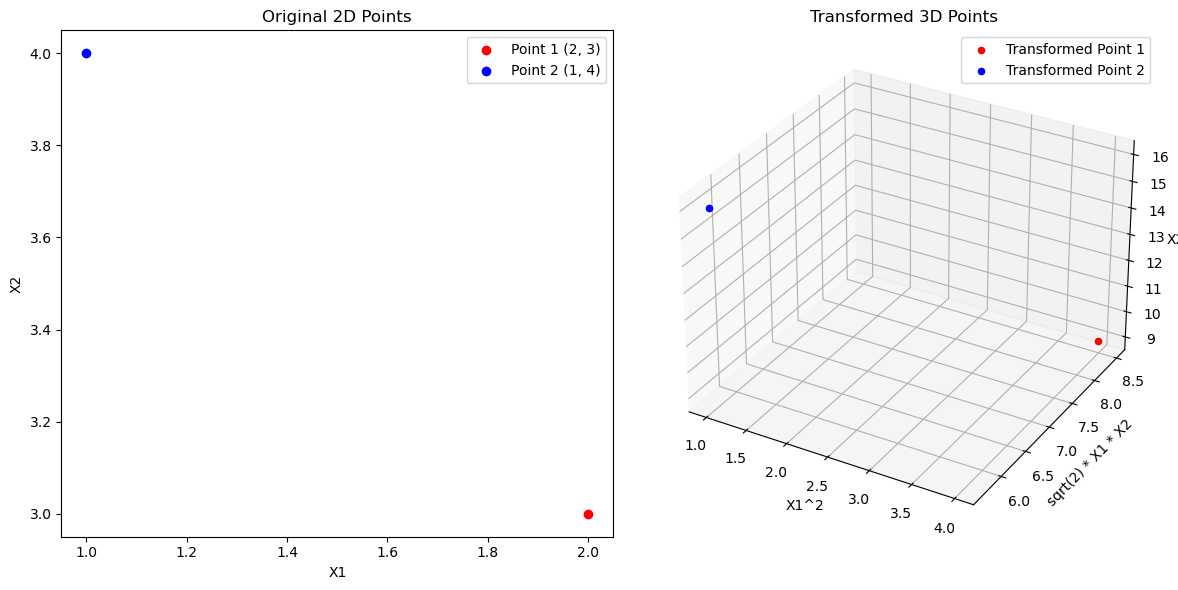

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the polynomial kernel transformation function
def polynomial_kernel_transform(x, r=1, d=2):
    return np.array([x[0]**2, np.sqrt(2) * x[0] * x[1], x[1]**2])

# Define the 2D points
x1 = np.array([2, 3])  # Point 1
x2 = np.array([1, 4])  # Point 2

# Apply the polynomial kernel transformation
phi_x1 = polynomial_kernel_transform(x1)
phi_x2 = polynomial_kernel_transform(x2)

# Print the transformed points in higher-dimensional space
print("Original 2D Point 1:", x1)
print("Transformed 3D Point 1:", phi_x1)
print("Original 2D Point 2:", x2)
print("Transformed 3D Point 2:", phi_x2)

# Plotting the original and transformed points
fig = plt.figure(figsize=(12, 6))

# 1st subplot: Original 2D points
ax1 = fig.add_subplot(121)
ax1.scatter(x1[0], x1[1], color='r', label="Point 1 (2, 3)")
ax1.scatter(x2[0], x2[1], color='b', label="Point 2 (1, 4)")
ax1.set_title("Original 2D Points")
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.legend()

# 2nd subplot: Transformed 3D points
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(phi_x1[0], phi_x1[1], phi_x1[2], color='r', label="Transformed Point 1")
ax2.scatter(phi_x2[0], phi_x2[1], phi_x2[2], color='b', label="Transformed Point 2")
ax2.set_title("Transformed 3D Points")
ax2.set_xlabel("X1^2")
ax2.set_ylabel("sqrt(2) * X1 * X2")
ax2.set_zlabel("X2^2")
ax2.legend()

plt.tight_layout()
plt.show()